In [12]:
from qiskit import Aer, execute, QuantumCircuit
from qiskit.visualization import plot_distribution

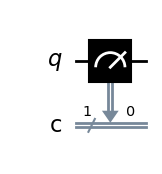

In [73]:
num_qubits = 1
num_cbits = 1
qc = QuantumCircuit(num_qubits, num_cbits)

# Eg. {0:0, 1:1}
measured_qubit_index_to_output_cbit_index = {q:c for (q, c) in zip(range(num_qubits), range(num_cbits))}
# Eg. [0, 1]
measured_qubit_indices = list(measured_qubit_index_to_output_cbit_index.keys())
# Eg. [0, 1]
output_cbit_indices = list(measured_qubit_index_to_output_cbit_index.values())
# qc.measure([0, 1], [0, 1])
qc.measure(measured_qubit_indices, output_cbit_indices)

qc.draw()

# **Running circuit many times, and graphing the probability distribution of the various results**

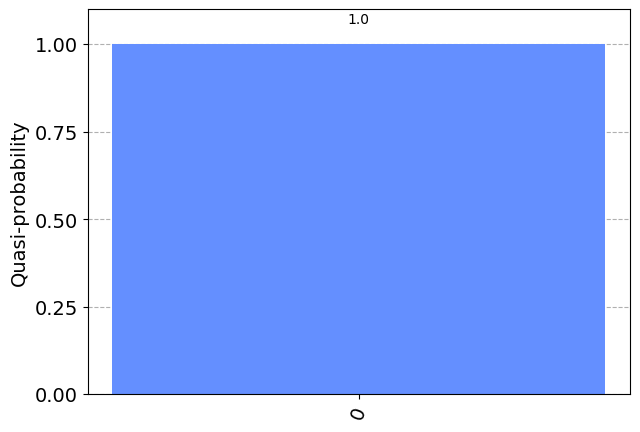

In [74]:
# Simulate using QASM
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend=backend, shots=1024)
result = job.result()
counts = result.get_counts()

plot_distribution(counts)

# **Running circuit *once*, and getting the random result from that one measurement**

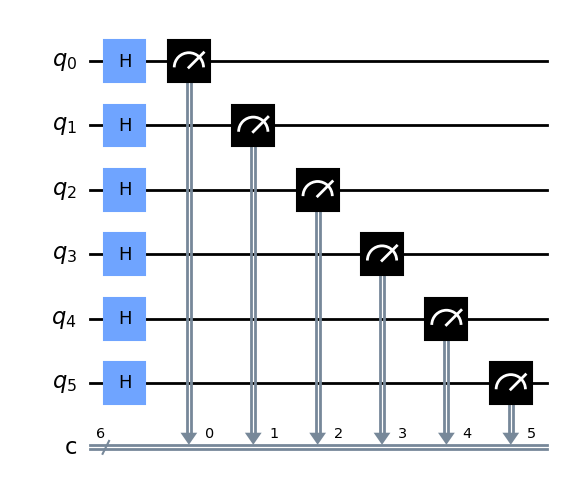

In [141]:
num_qubits = 6
num_cbits = 6
qc = QuantumCircuit(num_qubits, num_cbits)

# qc.x(1)

for i in range(num_qubits):
    qc.h(i)

# Eg. {0:0, 1:1}
measured_qubit_index_to_output_cbit_index = {q:c for (q, c) in zip(range(num_qubits), range(num_cbits))}
# Eg. [0, 1]
measured_qubit_indices = list(measured_qubit_index_to_output_cbit_index.keys())
# Eg. [0, 1]
output_cbit_indices = list(measured_qubit_index_to_output_cbit_index.values())
# qc.measure([0, 1], [0, 1])
qc.measure(measured_qubit_indices, output_cbit_indices)

qc.draw()

In [155]:
# Simulate using QASM
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend=backend, shots=1)
result = job.result()
counts = result.get_counts()

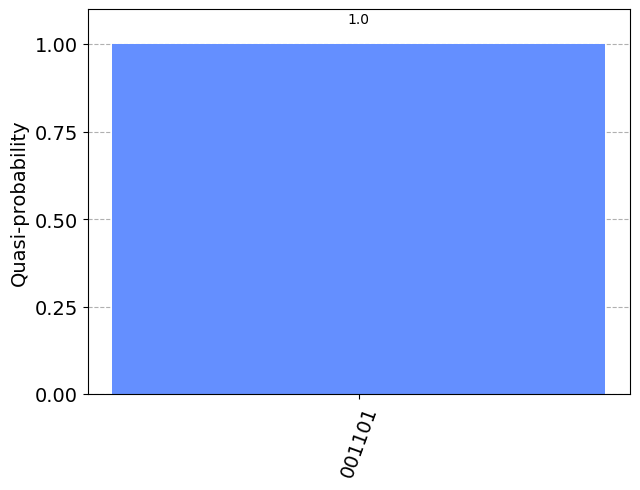

In [156]:
plot_distribution(counts)

In [157]:
counts.keys()

dict_keys(['001101'])

In [158]:
measured_value_strings_list = list(counts.keys())
measured_value_strings_list

['001101']

In [159]:
len(measured_value_strings_list)

1

In [160]:
measured_value_of_all_qubits_str = measured_value_strings_list[0]
measured_value_of_all_qubits_str

'001101'

In [164]:
for qubit_num in range(num_qubits):
    print(f'Qubit {qubit_num} (Attempt {qubit_num + 1}) collapsed to {measured_value_of_all_qubits_str[-(1 + qubit_num)]}')

Qubit 0 (Attempt 1) collapsed to 1
Qubit 1 (Attempt 2) collapsed to 0
Qubit 2 (Attempt 3) collapsed to 1
Qubit 3 (Attempt 4) collapsed to 1
Qubit 4 (Attempt 5) collapsed to 0
Qubit 5 (Attempt 6) collapsed to 0


## **Can we put qubit back into superposition (reset circuit) after measuring?**

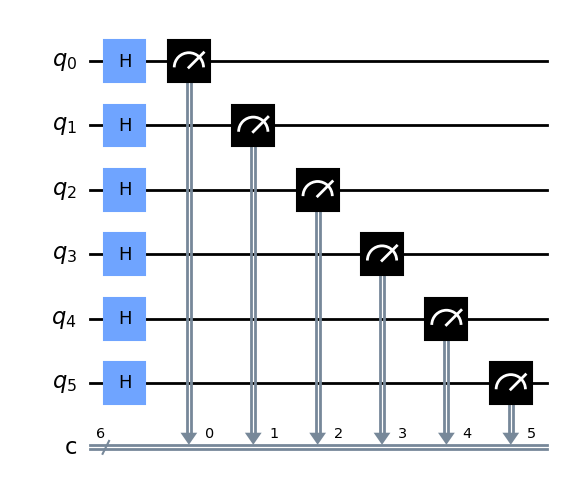

In [172]:
num_qubits = 6
num_cbits = 6
qc = QuantumCircuit(num_qubits, num_cbits)

for i in range(num_qubits):
    qc.h(i)

# Eg. {0:0, 1:1}
measured_qubit_index_to_output_cbit_index = {q:c for (q, c) in zip(range(num_qubits), range(num_cbits))}
# Eg. [0, 1]
measured_qubit_indices = list(measured_qubit_index_to_output_cbit_index.keys())
# Eg. [0, 1]
output_cbit_indices = list(measured_qubit_index_to_output_cbit_index.values())
# qc.measure([0, 1], [0, 1])
qc.measure(measured_qubit_indices, output_cbit_indices)

qc.draw()

### **First Measurement (Circuit Execution/Simulation)**

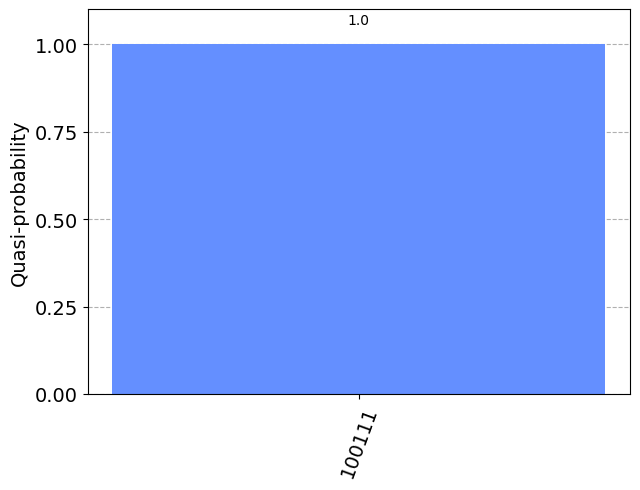

In [173]:
# Simulate using QASM
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend=backend, shots=1)
result = job.result()
counts = result.get_counts()
plot_distribution(counts)

### **Second Measurement (Circuit Execution/Simulation)**

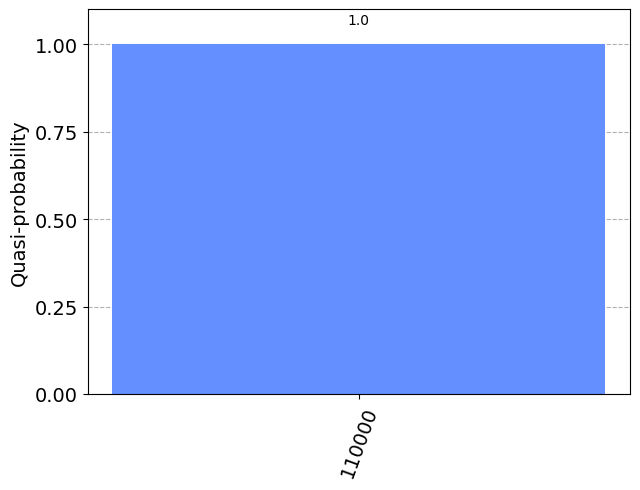

In [174]:
# Simulate using QASM
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend=backend, shots=1)
result = job.result()
counts = result.get_counts()
plot_distribution(counts)

Contrary to what the comments in Quantum Tic Tac Toe code said, it does not look like Qiskit "forces us to create a new circuit" after every measurement/execution -- we just run the execution (in this case, simulation since it's running on a simulator) code whenever we want to start over

In [165]:
import qiskit.tools.jupyter
%qiskit_version_table